# Cluster membership based on color-magnitude

In [1]:
%pylab inline
%config InlineBackend.figure_format='retina'

import pylab as plt
import numpy as np
from libs import (figrc, setup_mpl)
setup_mpl.theme()

# all relevant functions
from libs.membership import *

from libs.ipython_notebook import (disp_markdown, LatexFigure)

Populating the interactive namespace from numpy and matplotlib


/Users/fouesneau/anaconda/lib/python3.4/site-packages/IPython/nbconvert.py:13: ShimWarning: The `IPython.nbconvert` package has been deprecated. You should import from ipython_nbconvert instead.
  "You should import from ipython_nbconvert instead.", ShimWarning)
/Users/fouesneau/anaconda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


(latex macros)
$
    \newcommand{\dataerr}{\mathbf{\Sigma_D}}
    \newcommand{\PI}{\mathbf{\pi}}
    \newcommand{\dif}{\,\text{d}} 
    \newcommand{\given}{\,\mid\,}
    \newcommand{\prob}{\mathcal{P}}
    \newcommand{\data}{\mathbf{D}}
    \newcommand{\datai}{\mathbf{D_i}}
    \newcommand{\T}{\mathbf{\theta}}
    \newcommand{\Ti}{\mathbf{\theta_i}}
    \newcommand{\err}{\mathbf{\Sigma_D}}
    \newcommand{\erri}{\mathbf{\Sigma_{D,i}}}
    \newcommand{\like}{\mathcal{L}}
    \newcommand{\best}{\mathrm{best}}
    \newcommand{\normal}{\mathcal{N}}
    \newcommand{\Pbad}{\prob_{\mathrm{b}}}
    \newcommand{\union}{\cup}
    \newcommand{\intersect}{\cap}
    \newcommand{\argmax}{\operatornamewithlimits{arg\,max}}
    \newcommand{\argmin}{\operatornamewithlimits{arg\,min}}
    \newcommand{\card}{\operatorname{card}}     
    \newcommand{\sgn}{\operatorname{sgn}}
    \newcommand{\rank}{\operatorname{rank}}                             
    \newcommand{\EE}{\operatornamewithlimits{E}}
    \newcommand{\id}{\operatorname{id}}                 
   \newcommand{\abs}[1]{\left| #1 \right|}
   \newcommand{\norm}[1]{\left\| #1 \right\|}
   \newcommand{\pa}[1]{\left(#1\right)}
   \newcommand{\bra}[1]{\left[#1\right]}
   \newcommand{\cbra}[1]{\left\{#1\right\}}     
   \newcommand{\Vec}[1]{\overrightarrow}
   \newcommand{\mmatrix}[1]{\boldsymbol{#1}}
   \newcommand{\inverse}[1]{{#1}^{-1}}
   \newcommand{\transpose}[1]{{#1}^{\scriptscriptstyle \top}}
   \newcommand{\mean}[1]{\left<{#1}\right>}
   \newcommand{\Proba}[1]{\prob\left(\, #1 \,\right)}
   \newcommand{\proba}[1]{\prob(\, #1 \,)}
   \newcommand{\set}[1]{\left\{\,#1\,\right\}}
   \newcommand{\set}[1]{\left\{\,#1\,\right\}}
     \newcommand{\Unit}[1]{{\mathrm{~#1}}} % define unit
  \newcommand{\um}{\mu\mathrm{m}}
  \newcommand{\erg}{\Unit{erg}}
  \newcommand{\ergs}{\Unit{erg~s}}
  \newcommand{\yr}{\Unit{yr}}
  \newcommand{\Myr}{\Unit{Myr}}
  \newcommand{\Gyr}{\Unit{Gyr}}
  \newcommand{\pc}{\Unit{pc}}
  \newcommand{\kpc}{\Unit{kpc}}
  \newcommand{\Mpc}{\Unit{Mpc}}
  \newcommand{\Lsun}{\Unit{L}_{\odot}}
  \newcommand{\Zsun}{\Unit{Z}_{\odot}}
  \newcommand{\msun}{\Unit{M}_{\odot}}
  \newcommand{\kms}{\Unit{km\,s^{-1}}}
  \newcommand{\ang}{\AA}               %Angstrom unit
  \newcommand{\degpoint}{\mbox{$^\circ\mskip-7.0mu.\,$}}
  \newcommand{\halpha}{\mbox{H$\alpha$}}
  \newcommand{\hbeta}{\mbox{H$\beta$}}
  \newcommand{\hgamma}{\mbox{H$\gamma$}}
  \newcommand{\lya}{\mbox{Ly$\alpha$}}
  \newcommand{\lyb}{\mbox{Ly$\beta$}}
  \newcommand{\minpoint}{\mbox{$'\mskip-4.7mu.\mskip0.8mu$}}
  \newcommand{\mv}{\mbox{$m_{_V}$}}
  \newcommand{\Mv}{\mbox{$M_{_V}$}}
  \newcommand{\peryr}{\mbox{$\>\rm yr^{-1}$}}
  \newcommand{\secpoint}{\mbox{$''\mskip-7.6mu.\,$}}
  \newcommand{\sqdeg}{\mbox{${\rm deg}^2$}}
  \newcommand{\squig}{\sim\!\!}
  \newcommand{\subsun}{\mbox{$_{\normalsize\odot}$}}
  \newcommand{\sq}{\mbox{\rlap{$\sqcap$}$\sqcup$}}% 
  \newcommand{\arcdeg}{\mbox{$^\circ$}}% 
  \newcommand{\arcmin}{\mbox{$^\prime$}}% 
  \newcommand{\arcsec}{\mbox{$^{\prime\prime}$}}% 
  \newcommand{\fd}{\mbox{$.\!\!^{\mathrm d}$}}% 
  \newcommand{\fh}{\mbox{$.\!\!^{\mathrm h}$}}% 
  \newcommand{\fm}{\mbox{$.\!\!^{\mathrm m}$}}% 
  \newcommand{\fs}{\mbox{$.\!\!^{\mathrm s}$}}% 
  \newcommand{\fdg}{\mbox{$.\!\!^\circ$}}% 
  \newcommand{\slantfrac}{\case}% 
  \newcommand{\onehalf}{\slantfrac{1}{2}}% 
  \newcommand{\onethird}{\slantfrac{1}{3}}% 
  \newcommand{\twothirds}{\slantfrac{2}{3}}% 
  \newcommand{\onequarter}{\slantfrac{1}{4}}% 
  \newcommand{\threequarters}{\slantfrac{3}{4}}% 
  \newcommand{\ubvr}{\mbox{$U\!BV\!R$}}%% UBVR system 
  \newcommand{\ub}{\mbox{$U\!-\!B$}}%   % U-B 
  \newcommand{\bv}{\mbox{$B\!-\!V$}}%   % B-V 
  \newcommand{\vr}{\mbox{$V\!-\!R$}}%   % V-R 
  \newcommand{\ur}{\mbox{$U\!-\!R$}}%   % U-R 
  \newcommand{\ion}[2]{#1$\;${\small\rmfamily\@Roman{#2}}\relax}% 
  \newcommand{\nodata}{ ~$\cdots$~ }% 
  \newcommand{\diameter}{\ooalign{\hfil/\hfil\crcr\mathhexbox20D}}% 
  \newcommand{\degr}{\arcdeg}% 
  \newcommand{\sun}{\odot}% 
  \newcommand{\Sun}{\sun}% 
  \newcommand{\Sol}{\sun}% 
  \newcommand{\Av}{{{\mathrm{A}}_{\mathrm{V}}}}
  \newcommand{\latin}[1]{\textsl{#1}}
  \newcommand{\aposteriori}{\latin{a~posteriori}}
  \newcommand{\apriori}{\latin{a~priori}}
  \newcommand{\adhoc}{\latin{ad~hoc}}
  \newcommand{\etal}{\latin{et~al.}}
  \newcommand{\eg}{{e.g.}}
  \newcommand{\ie}{\latin{i.e.}}
  \newcommand{\term}[1]{{\bf #1}}
  \newcommand{\code}[1]{{\tt #1}}
  \newcommand{\Fref}[1]{Fig.\,\ref{#1}}
  \newcommand{\Sref}[1]{\S\,\ref{#1}}
  \newcommand{\Eref}[1]{Eq.\,\ref{#1}}
$

## Data content

The following reads in the data.

```python

    data_path = {
        # images used for the profile fit
        'image475': 'ap{apid}/ap{apid}_F475W.fits',
        # match results
        'match_output': 'ap{apid}/console_ap{apid}.txt',
        'match_sfh': 'ap{apid}/param.sfh',
        'match_cmd': 'ap{apid}/ap{apid}_out.cmd',
        'match_fake': 'ap{apid}/ap{apid}_fake.dat',
        'match_sky': 'ap{apid}/ap{apid}_sky.fits',
        'match_bg': 'ap{apid}/bg.dat',
        # photometric catalog from PHAT
        'phot': 'ap{apid}/ap{apid}_phot.fits'
    }
```

In [2]:
apid = 'ap142'
cldata = get_cluster_data(apid)
cldata = extract_match_results(cldata)
# cldata is a dictionnary that stores revevant information

Keyrecords following the END keyrecord were ignored. [astropy.wcs.wcs]
        Use the `.cards` attribute instead. [libs.ezdata.simpletable]
        Use the `.cards` attribute instead. [libs.ezdata.simpletable]


In [3]:
disp_markdown("""We look at the Andromedra Project (AP) cluster: **{apid}**. 
The following figure will show the PHAT photometric catalog and image.
Photometry for individual cluster stars was performed with DOLPHOT, 
which is a version of HSTPHOT with HST specific modules (Dolphin 2000). 
We also generated a "background only" CMD, by extracting photometry from within an annulus 
from 1.2 to 3.4 the aperture radius, covering 10 times the cluster’s area.""".format(apid=apid.upper()))

We look at the Andromedra Project (AP) cluster: **AP142**. 
The following figure will show the PHAT photometric catalog and image.
Photometry for individual cluster stars was performed with DOLPHOT, 
which is a version of HSTPHOT with HST specific modules (Dolphin 2000). 
We also generated a "background only" CMD, by extracting photometry from within an annulus 
from 1.2 to 3.4 the aperture radius, covering 10 times the cluster’s area.

Figure: Fig-ap142-Data ( Available data from PHAT on cluster **ap142**. The left panel shows the HST F475W image centered on the cluster of interests. This image is roughly 10pc wide at the distance of M31.  The middle panel shows the individual stars where the dark region represents the "cluster" population contaminated by some field stars. Contamination is statistically assessed using the  content of the light gray region, which covers 10 times more area than the cluster region. The right panel shows the cluster and sky selection on an optical color magnitude diagram (CMD). )

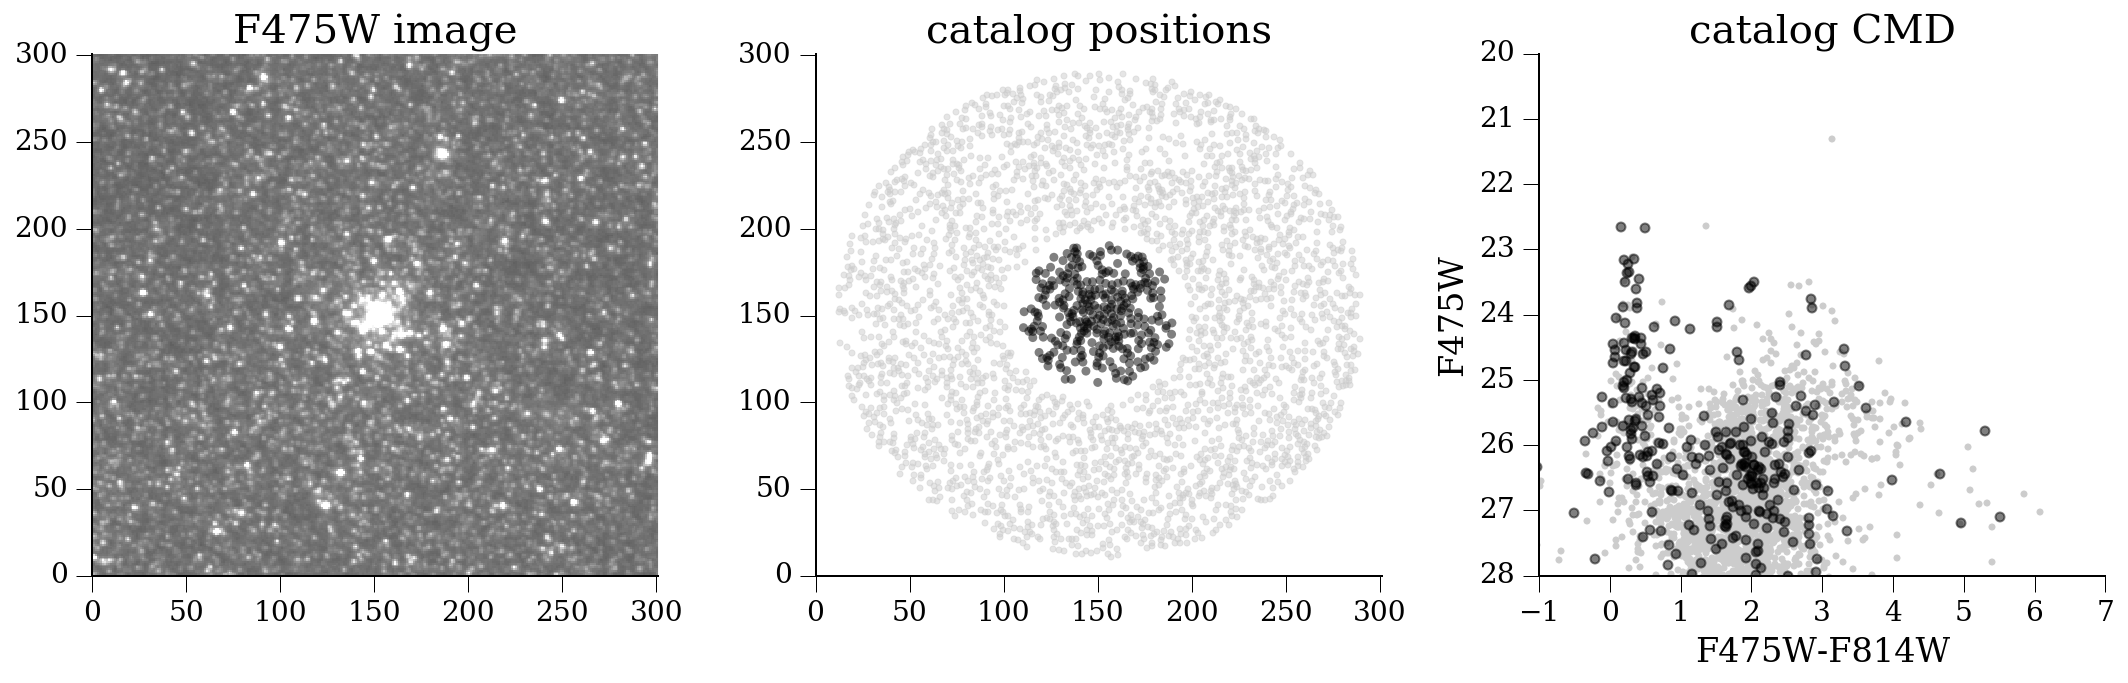

In [4]:
# show data
plot_data(cldata)
LatexFigure("Fig-{apid}-Data".format(apid=apid), """
Available data from PHAT on cluster **{apid}**. The left panel shows the HST F475W image centered
on the cluster of interests. This image is roughly 10pc wide at the distance of M31. 
The middle panel shows the individual stars where the dark region represents the "cluster"
population contaminated by some field stars. Contamination is statistically assessed using the 
content of the light gray region, which covers 10 times more area than the cluster region.
The right panel shows the cluster and sky selection on an optical color magnitude diagram (CMD).
""".format(apid=apid))

In addition to the photometric catalog, we ran intensive artificial star tests (ASTs) 
to characterize the photometric noise in every place of the optical color-magnitude diagram (CMD), 
and for this particular cluster. 

Artificial star tests (ASTs) were used to assess completeness and photometric bias within each cluster. The ASTs were generated by inserting the PSF of each fake star into the individual images for that cluster and then redoing the photometry with and without that AST. 50,000 artificial stars were created for each cluster, with the stars being distributed both spatially as a function of their light profile and uniformly on the CMD.

## Color-magnitude diagram fitting

We performed CMD fitting to the resolved stars using a modified version of the MATCH fitting program (Dolphin 2002), optimized for fitting a single age population plus a background model. MATCH takes the following parameters as inputs: IMF, binary fraction, extinction, distance, and stellar evolution library. For a range of age and metallicity combinations, MATCH generates model CMDs using the given stellar evolution library for bins in CMD space. Artificial star tests (ASTs) are used to model the completeness and photometric errors, which are then convolved with the model CMD. The background is statistically modeled and added to the model CMD with the appropriate density weighted scheme.

In other words, the likelihood probability of observing a star of given color $c$ and magnitude $m$ is given by:
\begin{equation}
\proba{c,\,m \given age,\, \delta age,\, SFR,\, A_V,\, Z,\, bg,\, noise} = \prob_{SSP}\left(c, m \given age,\, \delta age,\, SFR,\, A_V,\, Z,\, noise\right) + \alpha\, \prob_{bg}\left(c,\, m \given bg,\, noise\right),
\end{equation}
where $\alpha$ rescales the density of field stars appropriately to account for the contamination of the CMD.

Figure: Fig-ap142-matchpg (Modeling the color-magnitude diagram of ap142. We performed CMD fitting of a simple stellar population  with a background contamination to the resolved stars of cluster ap142. The fitting procedure  (see text) assumes a Poisson likelihood on the binned CMD while accounting for the photometric  noise derived from intensive artificial star tests. The top left panel shows the observed CMD,  which compares with the best fit model given by the top right panel. The residuals and  residual  significance are shown on the bottom row. All computations are made with the same fixed binning  scheme.)

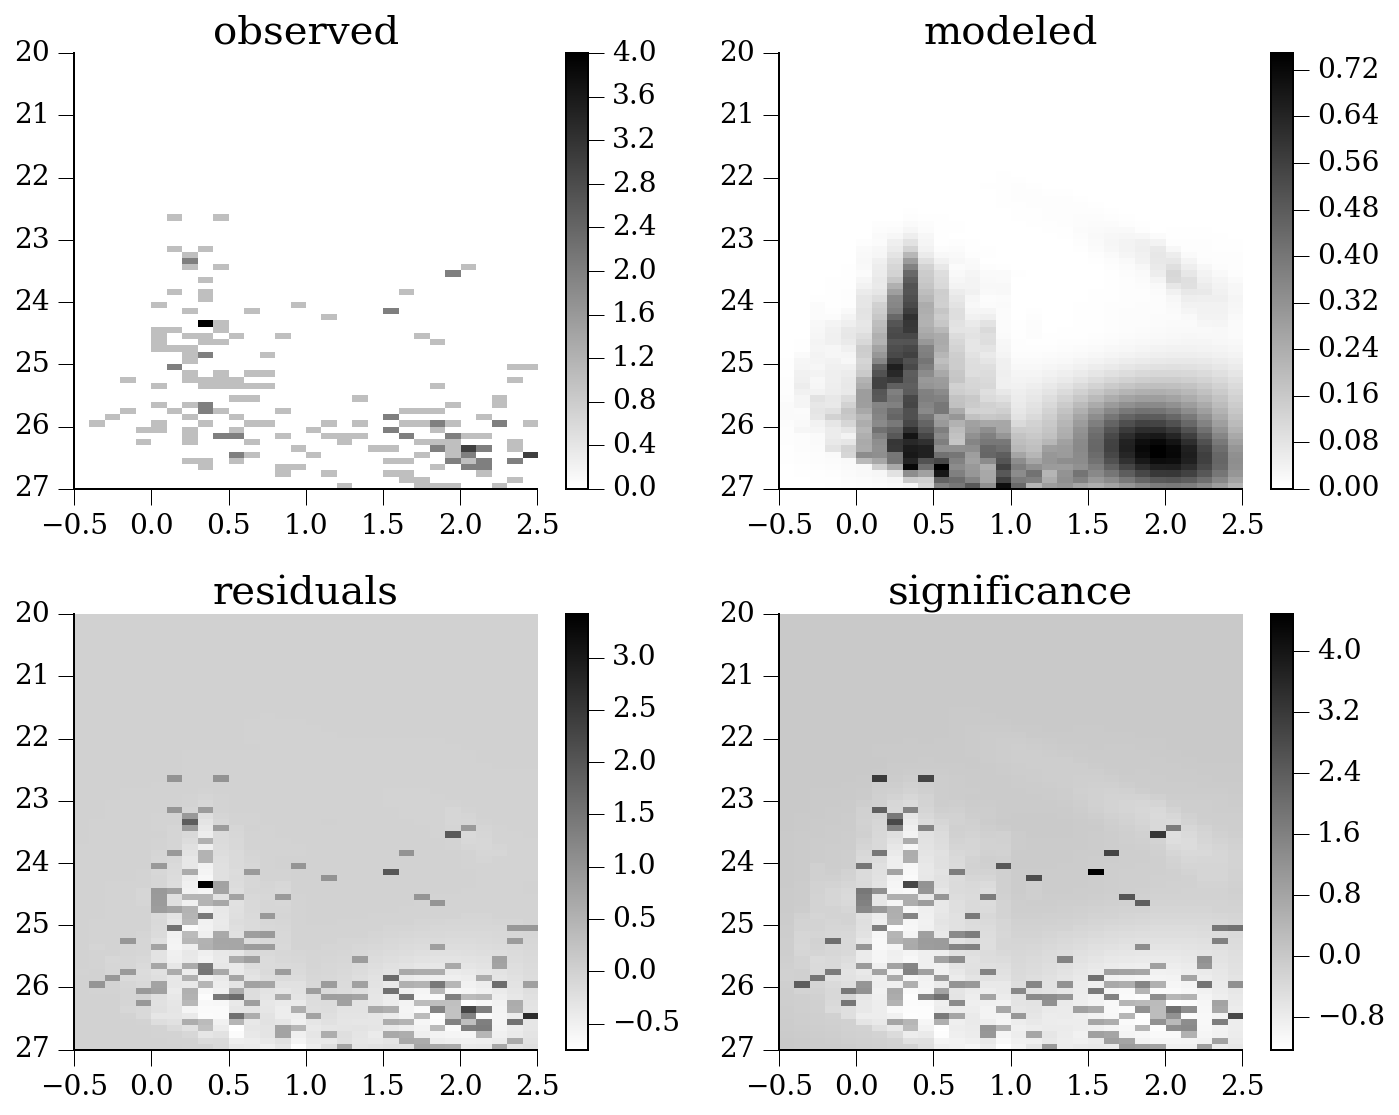

In [5]:
# show match model
plot_match_cmd_results(cldata)

LatexFigure("Fig-{apid}-matchpg".format(apid=apid), 
"""Modeling the color-magnitude diagram of {apid}. We performed CMD fitting of a simple stellar population 
with a background contamination to the resolved stars of cluster {apid}. The fitting procedure 
(see text) assumes a Poisson likelihood on the binned CMD while accounting for the photometric 
noise derived from intensive artificial star tests. The top left panel shows the observed CMD, 
which compares with the best fit model given by the top right panel. The residuals and  residual 
significance are shown on the bottom row. All computations are made with the same fixed binning 
scheme.""".format(apid=apid))

The best fit age and extinction model is found using the minimum of the Poisson likelihood $L$, since the number counts of stars in a CMD is Poisson distributed. The mass is not a direct model parameter, instead the star formation rate (SFR) is used to account for some age spread. The mass is recovered by integrating the SFR through time. 

The goodness of fit parameter that comes out of the Poisson likelihood is used to infer the reported uncertainties.
Similarly to the $\chi^2$, the Poisson equivalent function is given by:

$$P(n | m) =  e^{-m} \frac{m ^ n}{n!},$$

with $m$ is the number of predicted counts by the model, and $n$ is the number of observed counts within the same color-magnitude bin.

Recalling that $\chi^2$ is defined as $-2 \ln(P)$ for a Gaussian distribution and equals zero where $m = n$, we treat the Poisson probability in the same manner to get the above formula: 

\begin{eqnarray}
\ln P(n | m) =
& 2 m                                                     & \textrm{if } n = 0,\\
& 2 \left( 10^{-3} + n \times \ln(n/10^{-3}) - n \right)  & \textrm{if } m < 0.001\\
& 2 \left( m + n \times \ln(n/m) - n \right)              & \textrm{otherwise}
\end{eqnarray}


The fit parameter is equal to $-2 \ln(L)$, meaning that the difference in the fit parameter of a given model relative to that of the best fit model goes as $\sigma^2$. Thus, all fit values less than 1 away from the minimum fit value are within one standard deviation of the best fit. This method produces a full probability distribution function (PDF) for each cluster. When reporting uncertainties in a single parameter, we calculate the minimum and maximum values that are within one standard deviation of the best fit.

Figure: Fig-ap142-match2dpdfs ( Age, mass and extinction joint posterior distributions of cluster ap142.  The best fit age and extinction model is found using the minimum of the Poisson likelihood.  The mass is not a direct model parameter, instead it is recovered by integrating the star  formation rate (SFR) through the age bin of the simple stellar population. Map colors  represent the log-posterior distribution, while contours show the 1,2 and 3 $\sigma$  contours.)

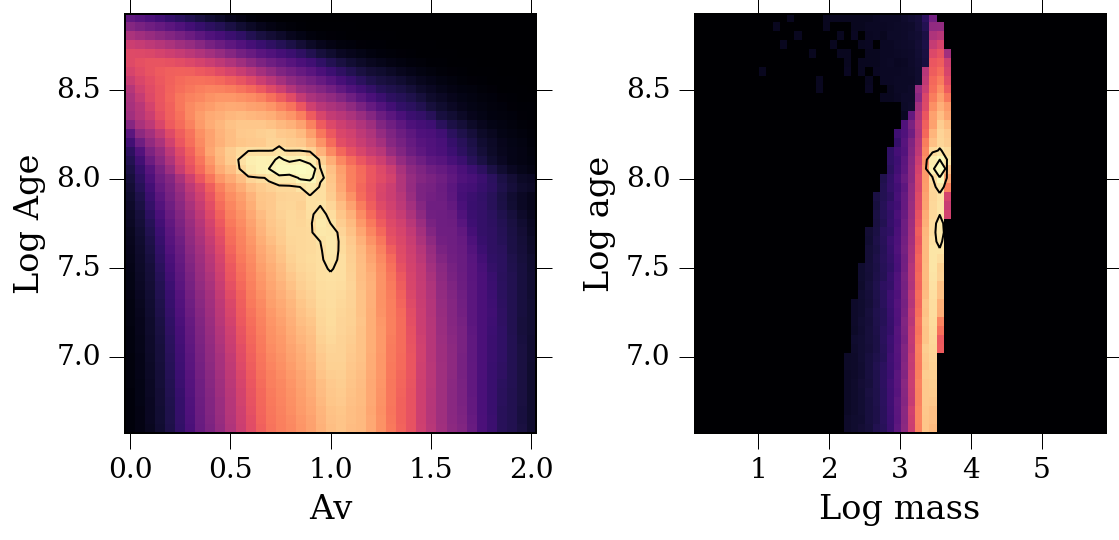

In [6]:
# parameters
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_joint_av_age_pdf(cldata)
plt.subplot(122)
plot_joint_mass_age_pdf(cldata)
plt.tight_layout()
LatexFigure("Fig-{apid}-match2dpdfs".format(apid=apid), """
Age, mass and extinction joint posterior distributions of cluster {apid}. 
The best fit age and extinction model is found using the minimum of the Poisson likelihood. 
The mass is not a direct model parameter, instead it is recovered by integrating the star 
formation rate (SFR) through the age bin of the simple stellar population. Map colors 
represent the log-posterior distribution, while contours show the 1,2 and 3 $\sigma$ 
contours.""".format(apid=apid))

Figure: Fig-ap142-match1dpdfs ( Age, extinction, metallicity, and mass marginalized posterior distributions  of cluster ap142, from left to right, respectively.  )

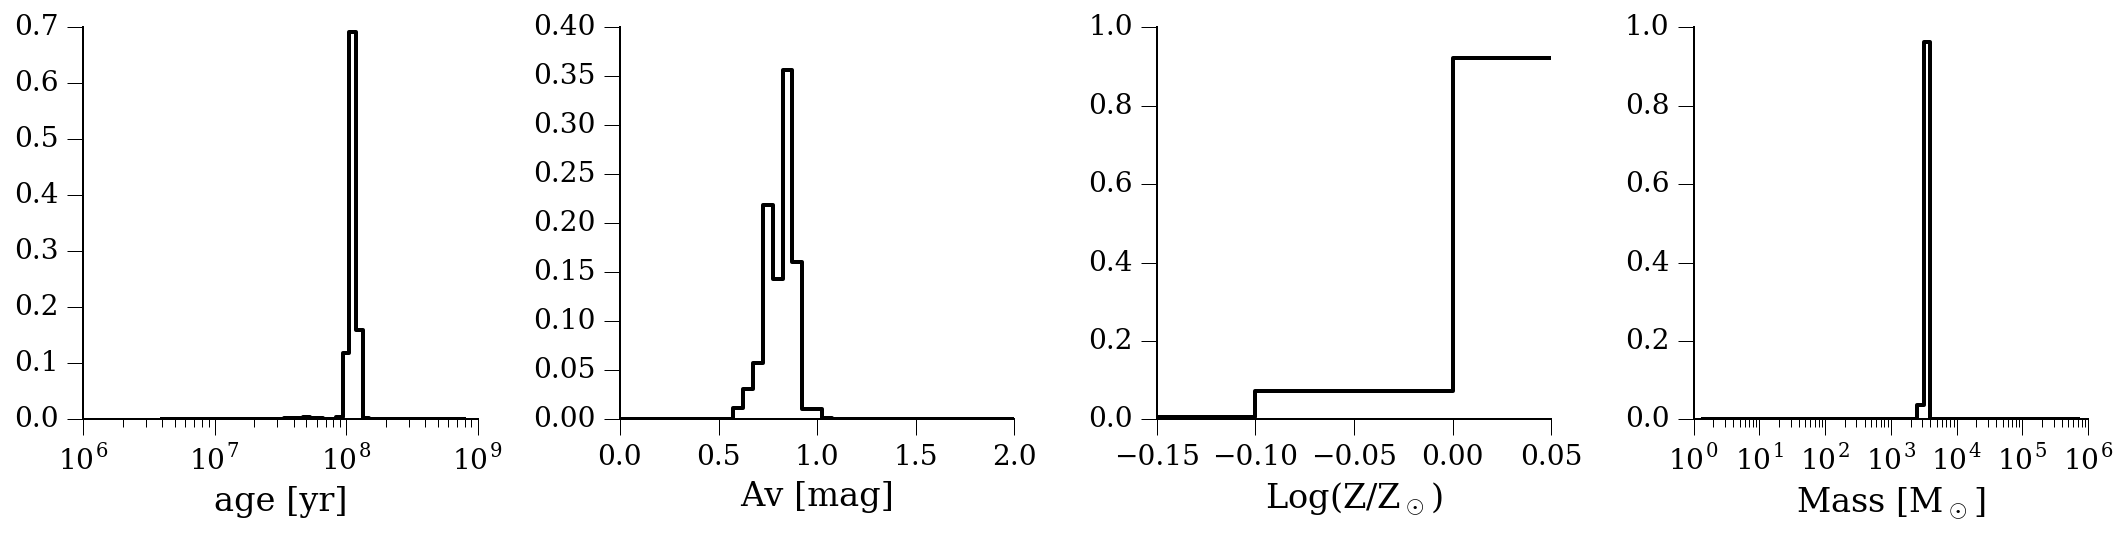

In [7]:
plot_1d_pdfs(cldata)
LatexFigure("Fig-{apid}-match1dpdfs".format(apid=apid), """
Age, extinction, metallicity, and mass marginalized posterior distributions 
of cluster {apid}, from left to right, respectively. 
""".format(apid=apid))

## Membership from CMD only

Explicitly MATCH does not report $\prob_{bg}$ and $\prob_{SSP}$ independently, but only the final combined model density $\proba{c, m \given \ldots}$. Therefore, we must reconstruct both terms manually.

The background is a fixed density distribution constructed from the Hess diagram of the "background" stars. The binning and smoothing gaussian kernels are reported by MATCH and therefore it is relatively simple to construct manually $\prob_{bg}\left(c, m \given \ldots\right)$. The scaling factor $\alpha$ is reported with the other paramaters during optimization.

The cluster density distribution is then obtain by subtracting the scaled background distribution to the complete model: $$\prob_{cl}\left(c, m \given \ldots \right) = \proba{c, m \given \ldots} - \alpha \, \prob_{bg}\left(c, m \given \ldots \right).$$

Once the latter quantity is obtained, we can compute the likelihood of a color-magnitude measurement to correspond to a star in the cluster, but also the odds of an observed star to be a member relative to the field population by the following ratio:

\begin{equation}
\textrm{odds}(cluster\,/\, field) = \frac{\prob_{cl}(c, m \given \ldots)}{\alpha \, \prob_{bg}(c, m \given \ldots)}.
\end{equation}

The following figure illustrates both components and the estimated membership odds per star for a cluster of interests.

Figure: Fig-ap142-matchmembership ( Model decomposition and membership assessments per individual star. Using the best fit model,  we can decompose the population into a cluster and a contamination component. These two  componenents are shown on the two most left panels in number density units per color  magnitude bin. The black dots represent the stars within the cluster aperture region.  For each star, one can estimate the odds of being a cluster member, which we show on the  most right panel for all stars within the cluster region (outlined dots) and also the  sky region (mostly dark red dots).)

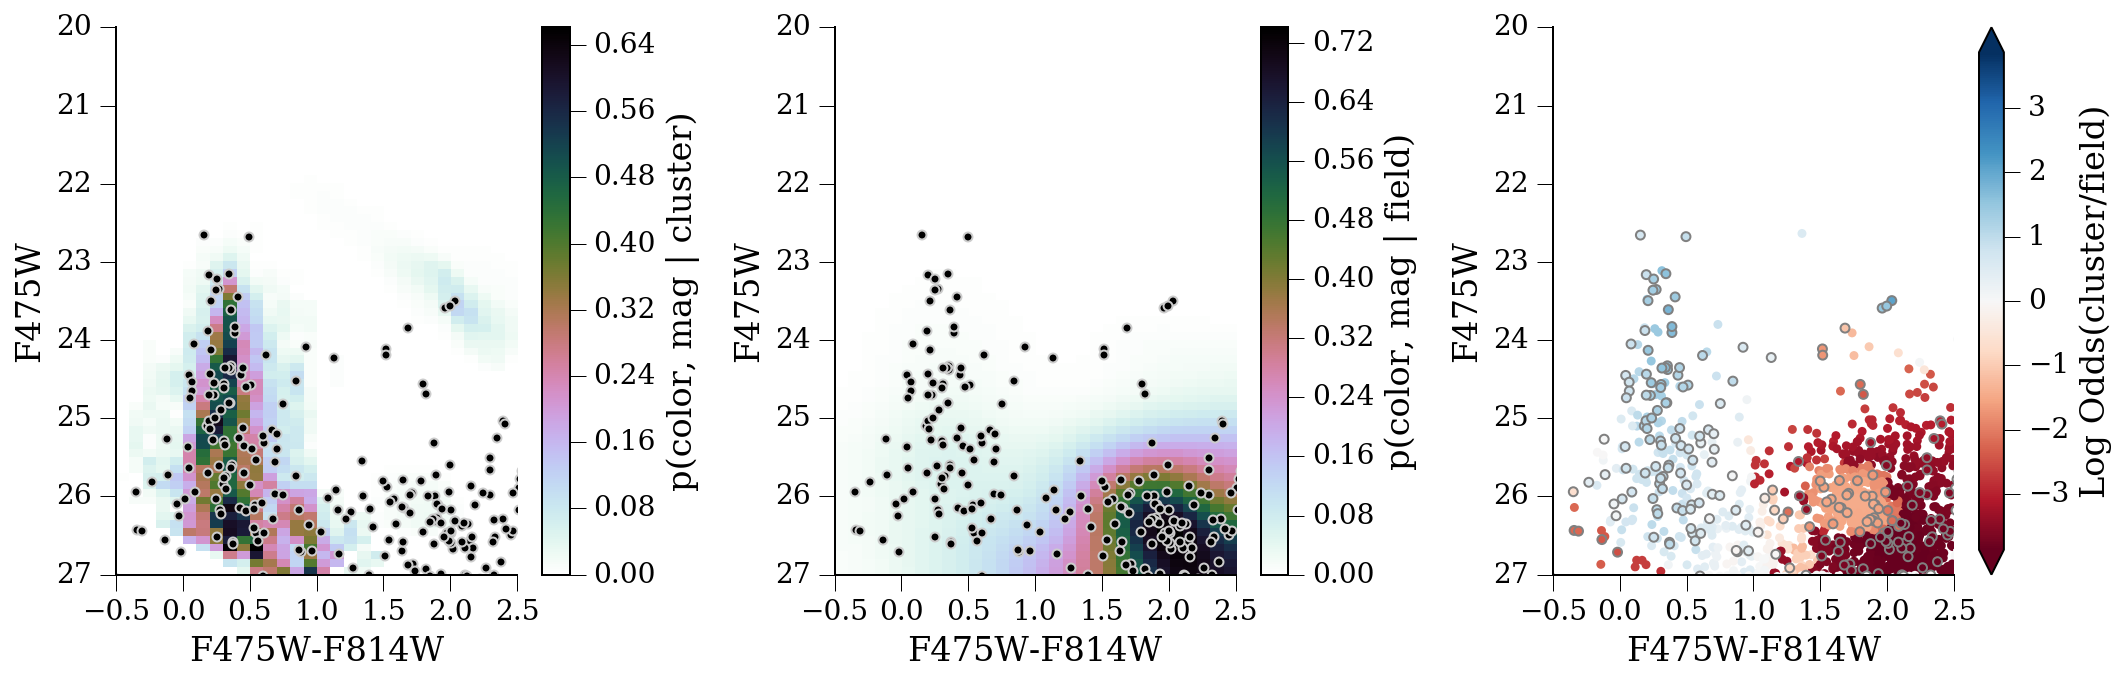

In [8]:
#membership
plt.figure(figsize=(15, 5))
# plot pr(color, mag | cluster)
plt.subplot(131)
plot_prclusterCmd(cldata)
# plot pr(color, mag | field)
plt.subplot(132)
plot_prskyCmd(cldata)
# plot Odds
plt.subplot(133)
plot_logOddsCmd(cldata)
plt.tight_layout()
LatexFigure("Fig-{apid}-matchmembership".format(apid=apid), """
Model decomposition and membership assessments per individual star. Using the best fit model, 
we can decompose the population into a cluster and a contamination component. These two 
componenents are shown on the two most left panels in number density units per color 
magnitude bin. The black dots represent the stars within the cluster aperture region. 
For each star, one can estimate the odds of being a cluster member, which we show on the 
most right panel for all stars within the cluster region (outlined dots) and also the 
sky region (mostly dark red dots).""".format(apid=apid))